## Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


I used a dataset from another source wich have the columns name. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Our data is complete in the way that we dont have null values. And we have integer and float dtype. 

In [4]:
print(df['Type of glass'].unique())

[1 2 3 5 6 7]


We don't have type 4 of glass. 

In [5]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Very few information for type 6 also for 5. 

We can check again for the null values. 

In [6]:
df.isnull().values.any()

False

In [7]:
# I droped the id number because it has no contribution to our target

df.drop('Id number', axis = 1, inplace = True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


We have very well balanced columns and others that look really weird. Because I dont't have to much knoladge in this area, about glass I will go further without any modification regarding the outliers or skeweness. I want to transform the 'Type of glass' column into a bicategorical one as our problem suggest. 

window glass (classes 1-4) and non-window glass (classes 5-7).

In [9]:
df['Glass classification'] = [1 if x < 5 else 0 for x in df['Type of glass']]

In [10]:
df.drop('Type of glass', axis = 1, inplace = True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass classification
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


Now let's see the correlation between or features and target variables. I will use heatmap for this to get a visual representation as well. 

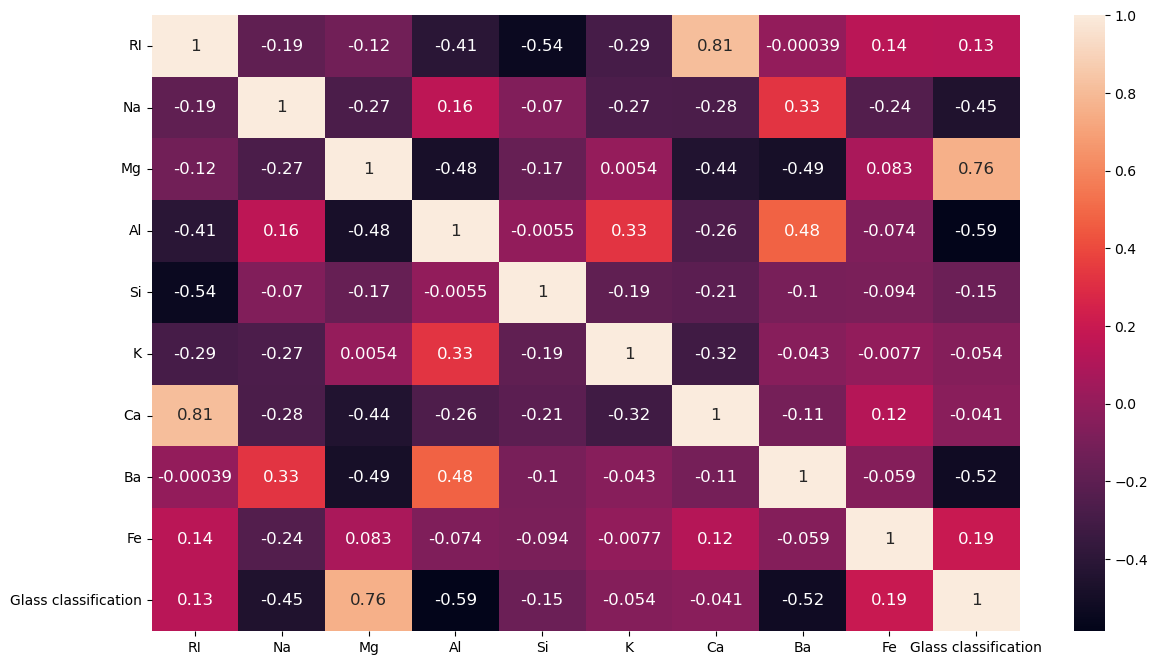

In [11]:
df_corr = df.corr() 

plt.figure(figsize = (14, 8))
sns.heatmap(df_corr, annot = True, annot_kws = {'size':12})
plt.show()

We can see that we have a series of strong correlations. Negative and positive. 

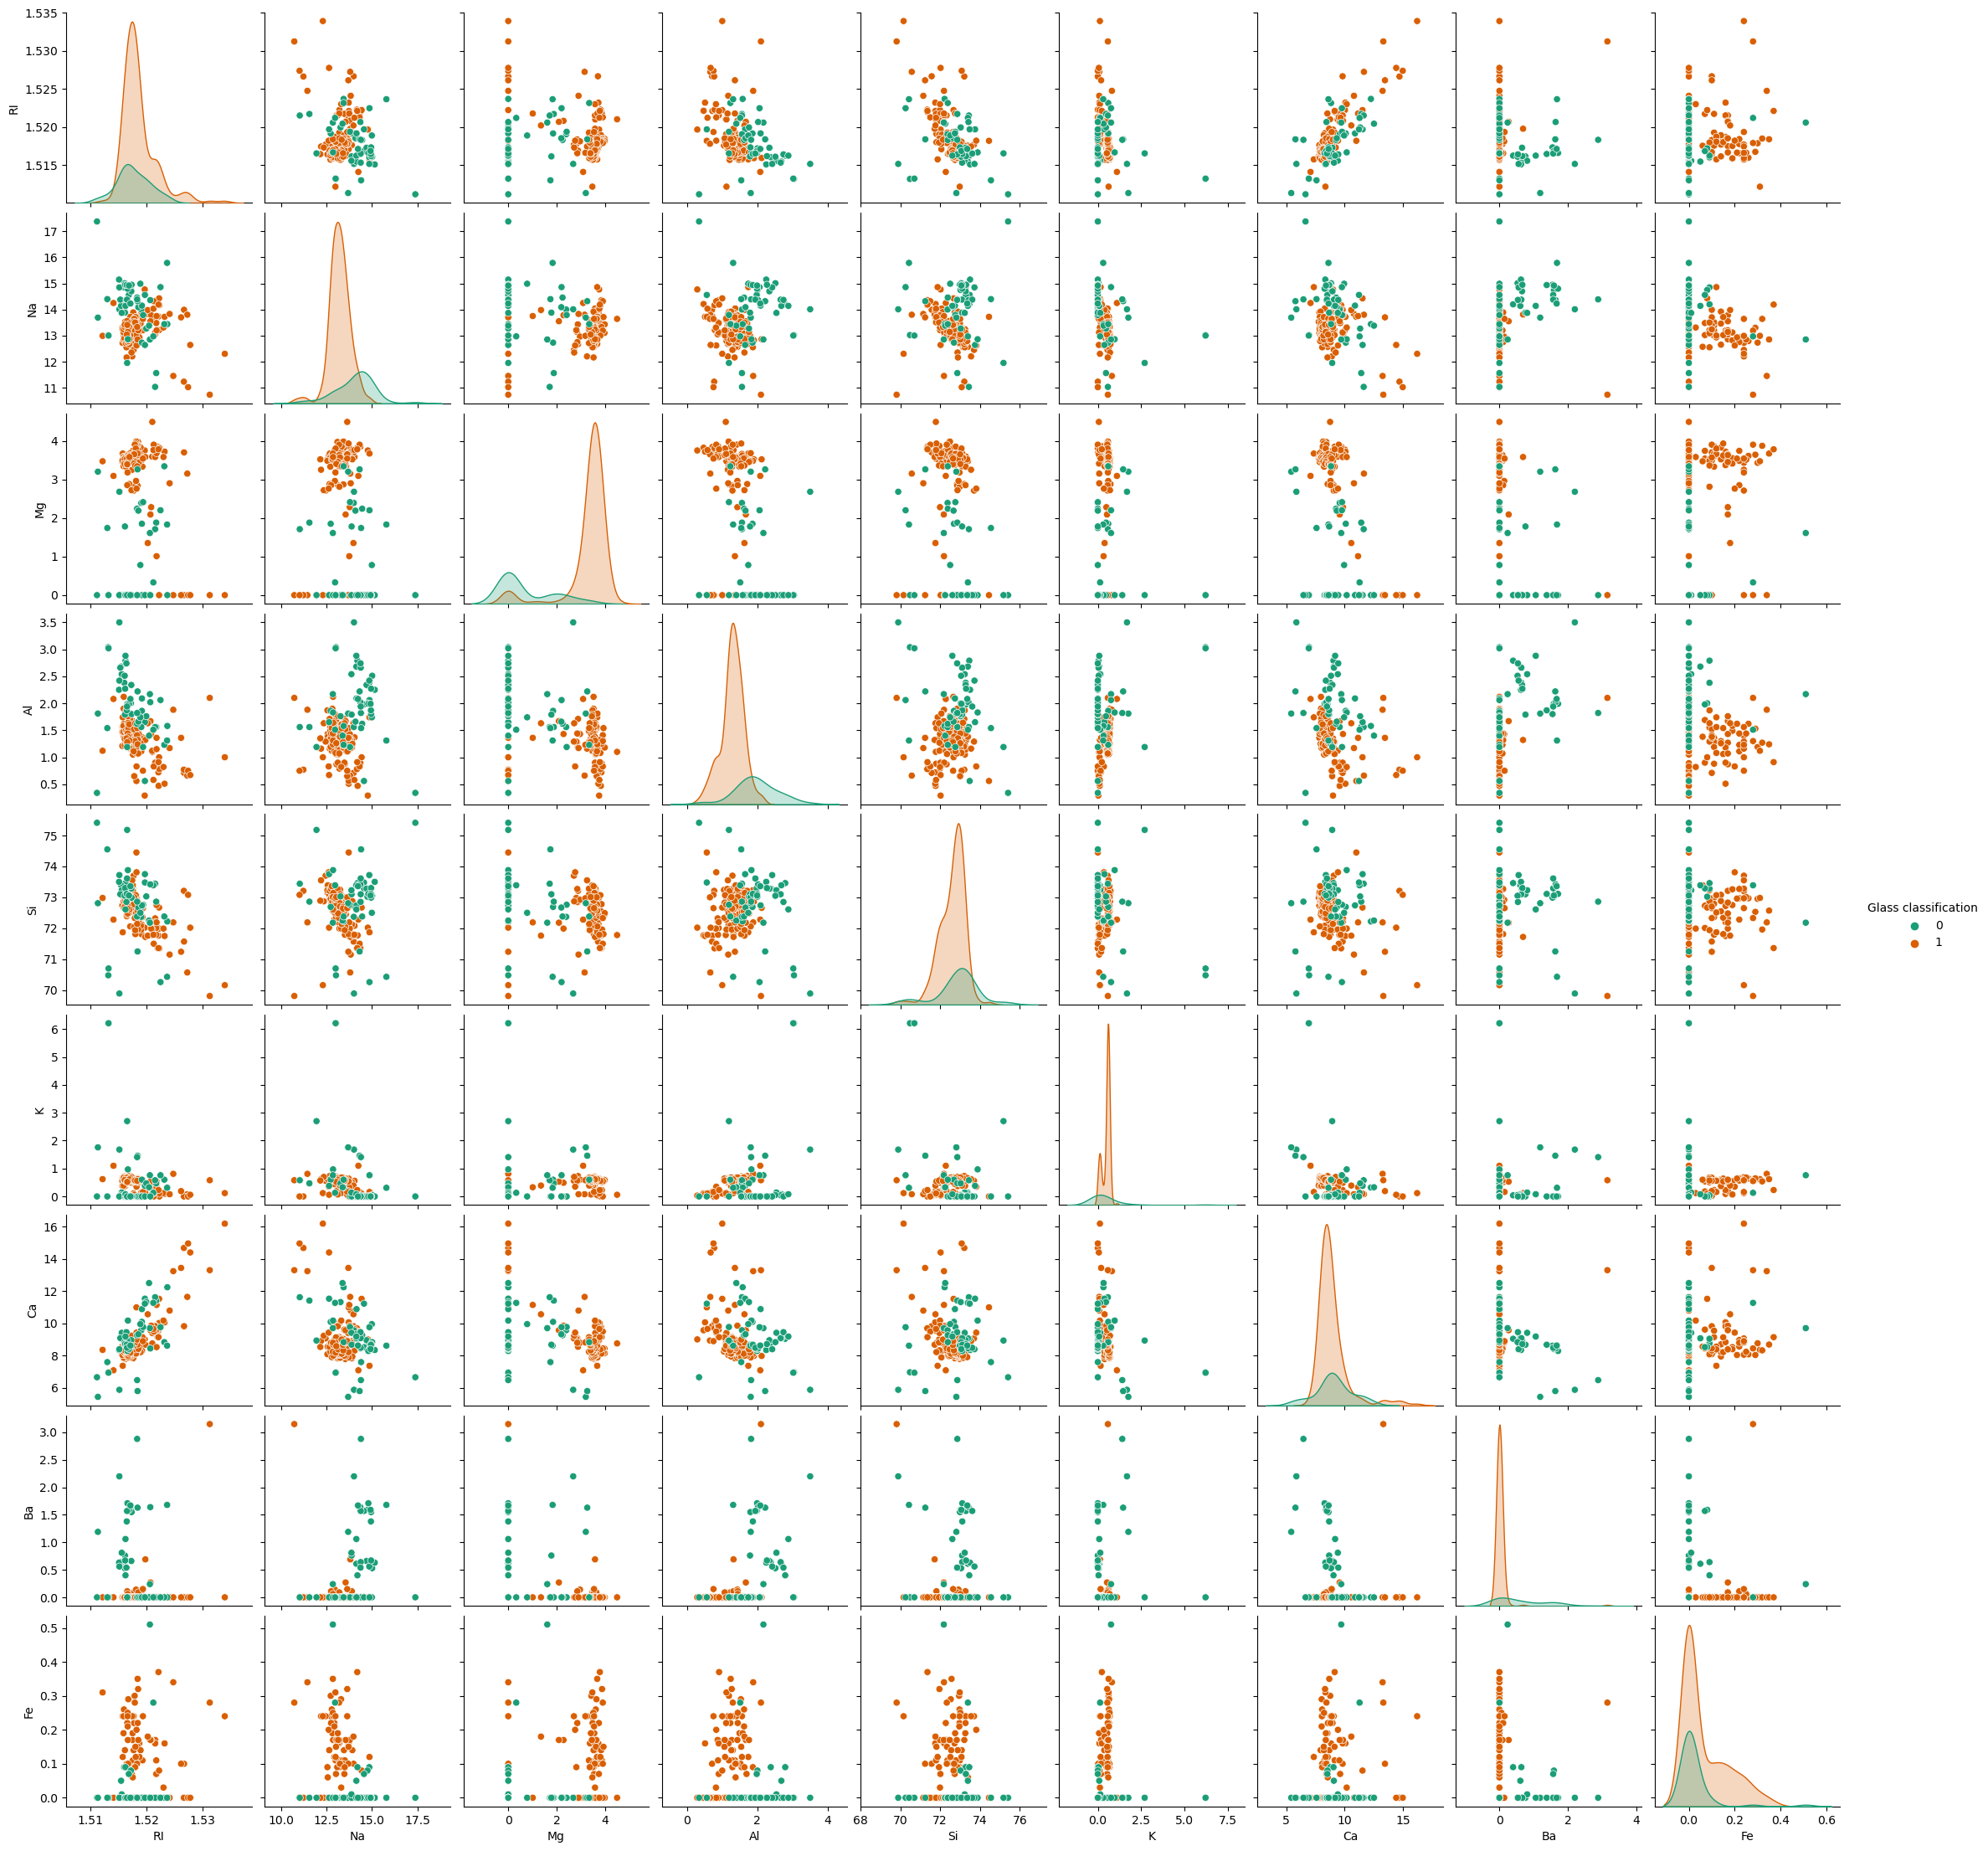

In [12]:
sns.pairplot(df, hue = 'Glass classification', palette = 'Dark2')
plt.show()

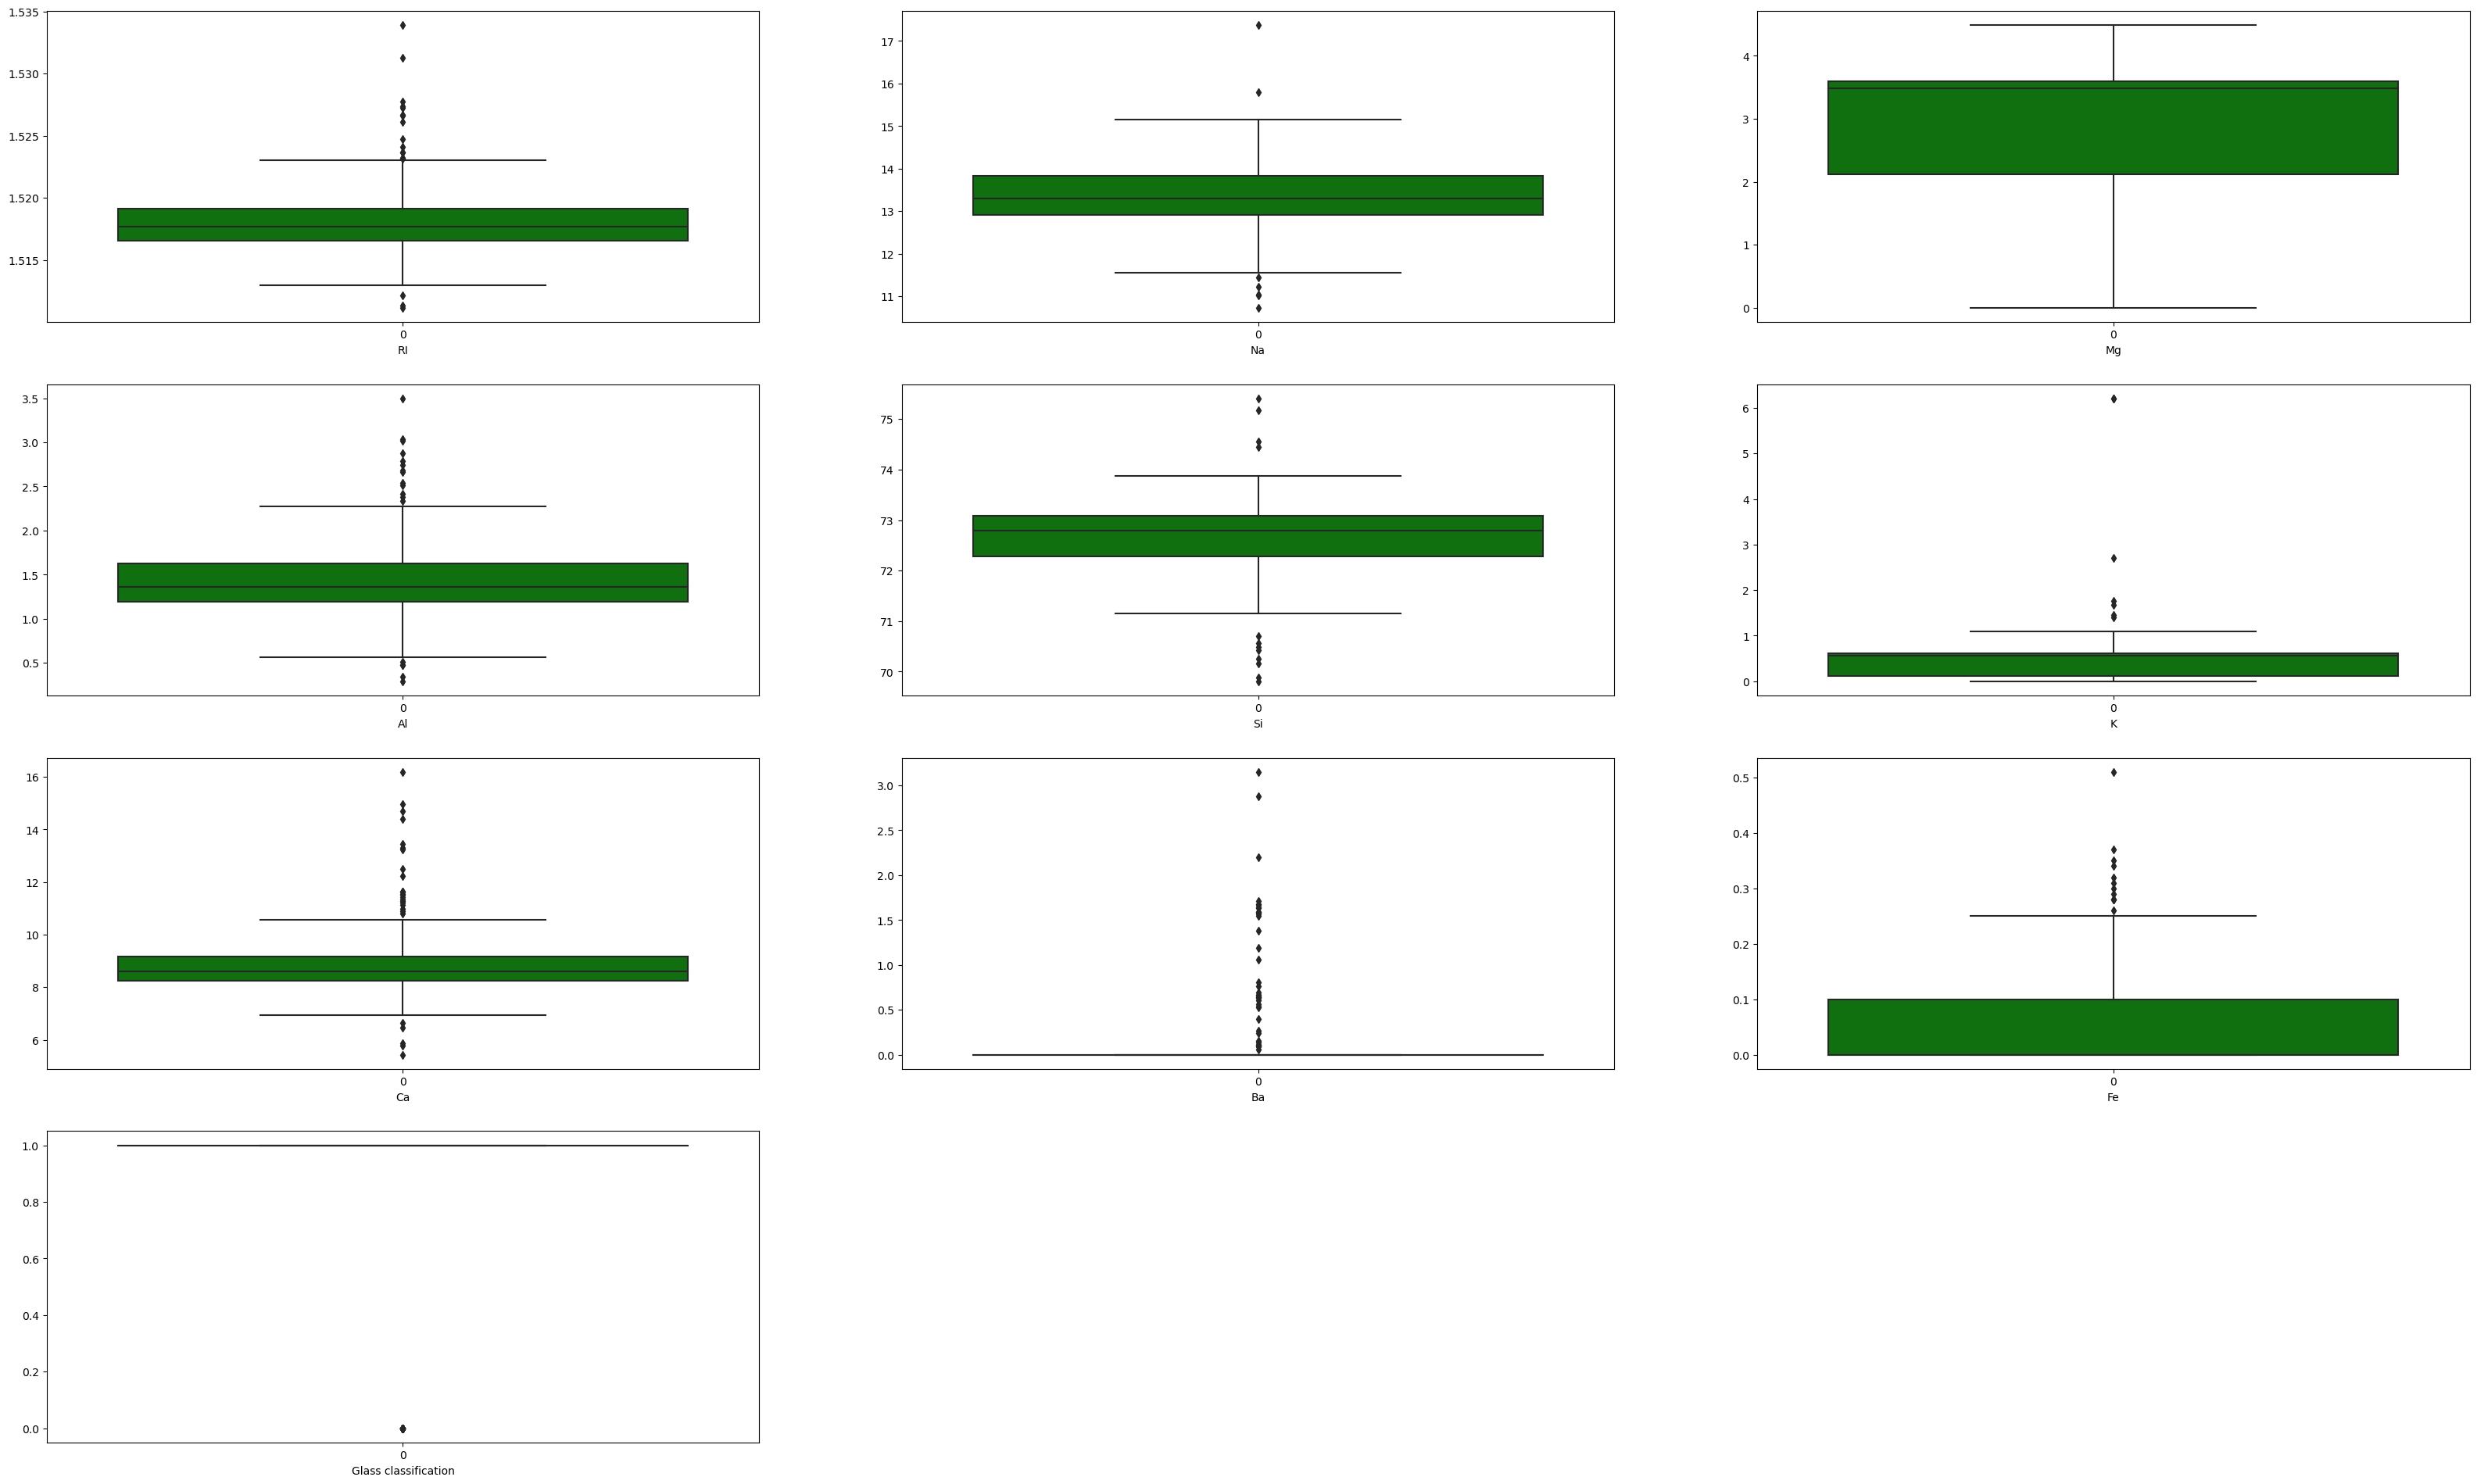

In [13]:
plt.figure(figsize = (40, 30))
p = 1
for i in df: 
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(df[i], color = 'green', orient = 'v')
        plt.xlabel(i)
    p +=1
plt.show()

(1.515, 1.525)

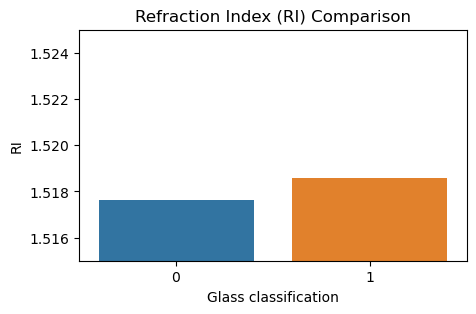

In [14]:
# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Refraction Index (RI) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['RI'], errorbar=None)
# Vertical axis label
plt.ylabel("RI")
plt.ylim(1.515, 1.525)

In [15]:
df.columns.to_list()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass classification']

Text(0, 0.5, 'Fe')

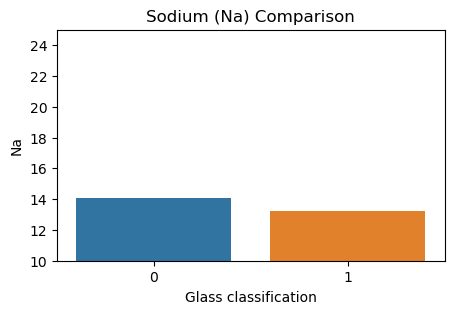

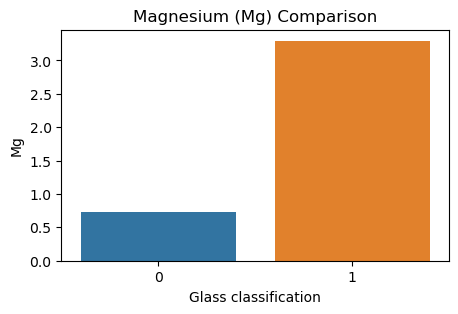

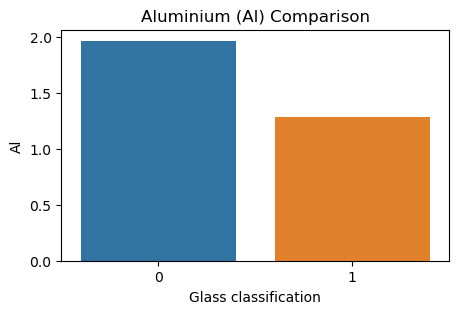

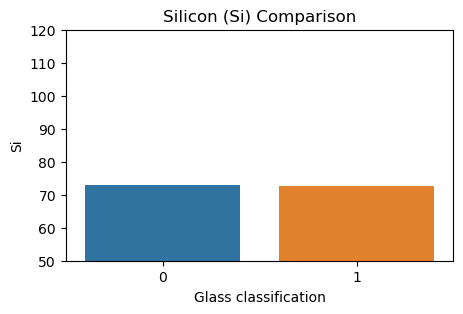

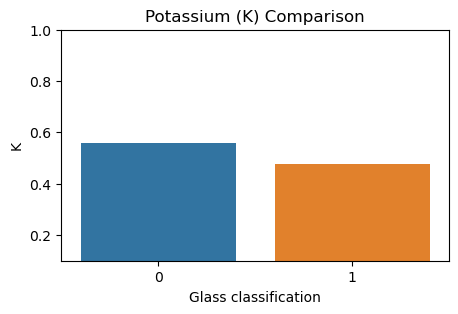

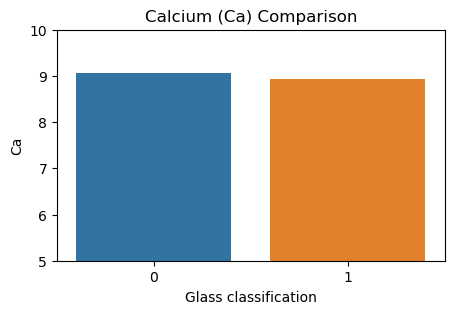

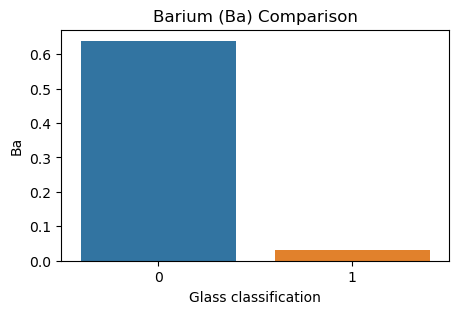

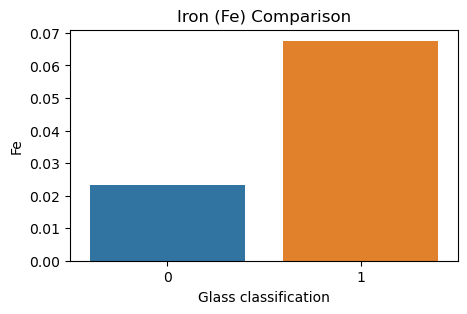

In [16]:
# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Sodium (Na) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Na'], errorbar=None)
# Vertical axis label
plt.ylabel("Na")
plt.ylim(10, 25)

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Magnesium (Mg) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Mg'], errorbar=None)
# Vertical axis label
plt.ylabel("Mg")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Aluminium (Al) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Al'], errorbar=None)
# Vertical axis label
plt.ylabel("Al")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Silicon (Si) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Si'], errorbar=None)
# Vertical axis label
plt.ylabel("Si")
plt.ylim(50, 120)

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Potassium (K) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['K'], errorbar=None)
# Vertical axis label
plt.ylabel("K")
plt.ylim(0.1, 1.0)

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Calcium (Ca) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Ca'], errorbar=None)
# Vertical axis label
plt.ylabel("Ca")
plt.ylim(5, 10)

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Barium (Ba) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Ba'], errorbar=None)
# Vertical axis label
plt.ylabel("Ba")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Iron (Fe) Comparison")
# Bar chart
sns.barplot(x=df['Glass classification'], y=df['Fe'], errorbar=None)
# Vertical axis label
plt.ylabel("Fe")

In [17]:
x = df.drop('Glass classification', axis = 1)
y = df['Glass classification']

In [18]:
x.shape

(214, 9)

In [19]:
y.shape

(214,)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [22]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [24]:
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=2)
SVM = SVC(kernel='linear',C=1)
ADA = AdaBoostClassifier()
RFC = RandomForestClassifier(n_estimators= 10, max_depth=115, bootstrap= False)

In [25]:
for model in [LR, KNN, SVM, ADA, RFC]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = accuracy_score(y_train, y_pred_train)
    pred_test_df = accuracy_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LogisticRegression()
Train Accuracy: 0.9415204678362573
Test Accuracy: 0.9767441860465116


model: KNeighborsClassifier(n_neighbors=2)
Train Accuracy: 0.9707602339181286
Test Accuracy: 0.9302325581395349


model: SVC(C=1, kernel='linear')
Train Accuracy: 0.935672514619883
Test Accuracy: 0.9767441860465116


model: AdaBoostClassifier()
Train Accuracy: 1.0
Test Accuracy: 1.0


model: RandomForestClassifier(bootstrap=False, max_depth=115, n_estimators=10)
Train Accuracy: 1.0
Test Accuracy: 0.9767441860465116




In [26]:
Final = RandomForestClassifier()
Final.fit(x_train, y_train)
pred = Final.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

97.67441860465115


In [27]:
conclusion = pd.DataFrame([Final.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
Predicted,1,0,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,0,1
Original,1,0,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,0,1
